# **ETL**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/internship_datasets/Heart Disease data.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# Display basic information about the dataset
print("\nBasic Information:")
print(data.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Display basic statistics of the dataset
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.00

# **EDA**

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Heart disease rates
heart_disease_counts = data['target'].value_counts()
print("\nHeart Disease Rates:")
print(heart_disease_counts)


Heart Disease Rates:
target
1    526
0    499
Name: count, dtype: int64


<ipython-input-9-41ae097ddd1b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis')


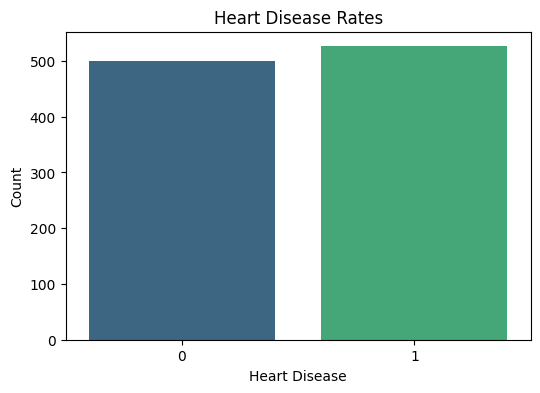

In [ ]:
# Plot heart disease rates
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Heart Disease Rates')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

In [ ]:
# Heart disease by gender
heart_disease_by_gender = data.groupby('sex')['target'].value_counts().unstack()
print("\nHeart Disease by Gender:")
print(heart_disease_by_gender)


Heart Disease by Gender:
target    0    1
sex             
0        86  226
1       413  300


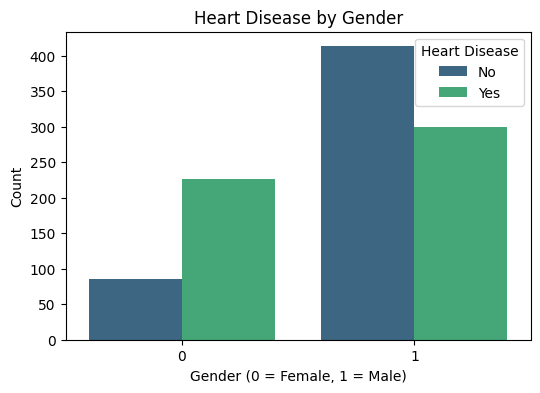

In [ ]:
# Plot heart disease by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='target', data=data, palette='viridis')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.show()


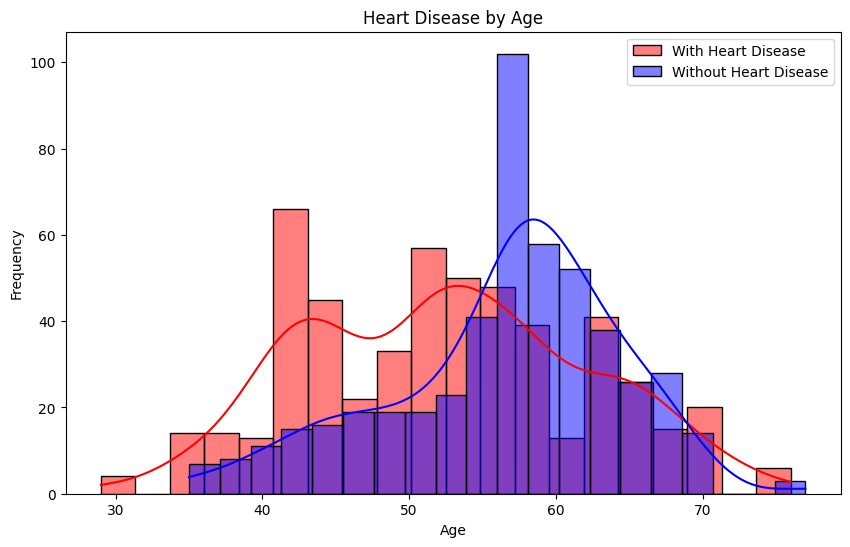

In [ ]:
# Heart disease by age
plt.figure(figsize=(10, 6))
sns.histplot(data[data['target'] == 1]['age'], kde=True, color='red', label='With Heart Disease', bins=20)
sns.histplot(data[data['target'] == 0]['age'], kde=True, color='blue', label='Without Heart Disease', bins=20)
plt.title('Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

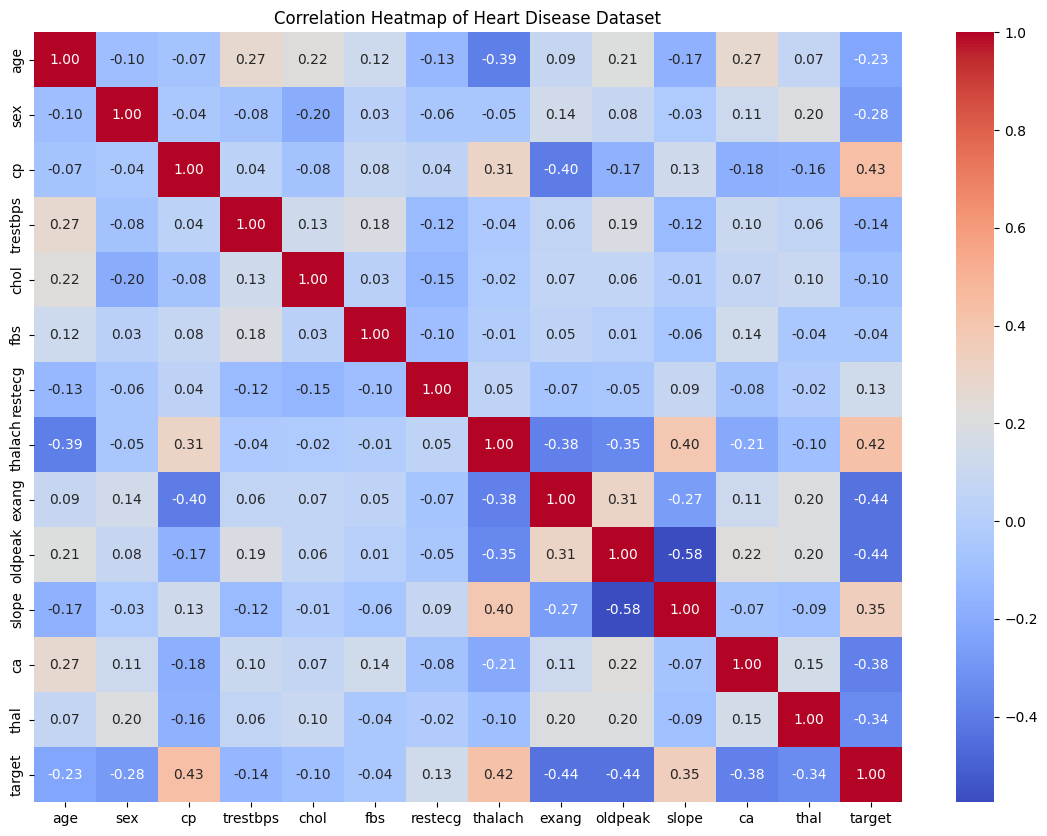

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Heart Disease Dataset')
plt.show()

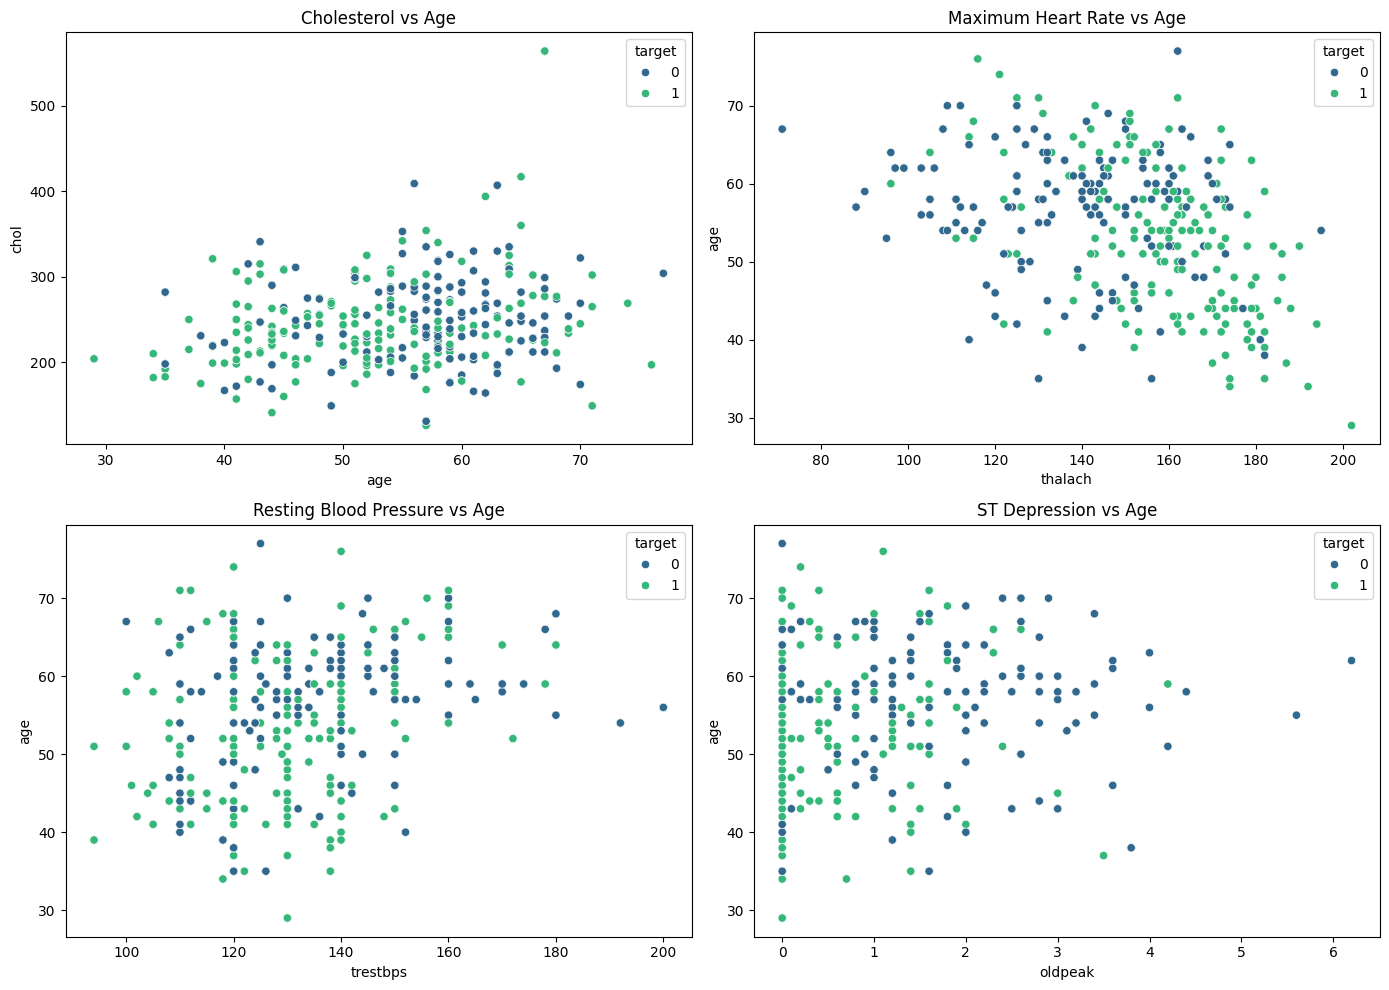

In [ ]:
# Scatter plots for key features
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.scatterplot(x='age', y='chol', hue='target', data=data, ax=axs[0, 0], palette='viridis')
axs[0, 0].set_title('Cholesterol vs Age')

sns.scatterplot(x='thalach', y='age', hue='target', data=data, ax=axs[0, 1], palette='viridis')
axs[0, 1].set_title('Maximum Heart Rate vs Age')

sns.scatterplot(x='trestbps', y='age', hue='target', data=data, ax=axs[1, 0], palette='viridis')
axs[1, 0].set_title('Resting Blood Pressure vs Age')

sns.scatterplot(x='oldpeak', y='age', hue='target', data=data, ax=axs[1, 1], palette='viridis')
axs[1, 1].set_title('ST Depression vs Age')

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
# Plotly interactive scatter plot
fig = px.scatter(data, x='age', y='chol', color='target', title='Cholesterol vs Age (Interactive)')
fig.show()

fig = px.scatter(data, x='thalach', y='age', color='target', title='Maximum Heart Rate vs Age (Interactive)')
fig.show()

In [ ]:
# Calculate mean and median age
mean_age = data['age'].mean()
median_age = data['age'].median()
print(f"\nMean Age: {mean_age}")
print(f"Median Age: {median_age}")


Mean Age: 54.43414634146342
Median Age: 56.0


In [ ]:
# Calculate mean and median cholesterol
mean_chol = data['chol'].mean()
median_chol = data['chol'].median()
print(f"\nMean Cholesterol: {mean_chol}")
print(f"Median Cholesterol: {median_chol}")


Mean Cholesterol: 246.0
Median Cholesterol: 240.0


In [ ]:
# Calculate mean and median maximum heart rate
mean_thalach = data['thalach'].mean()
median_thalach = data['thalach'].median()
print(f"\nMean Maximum Heart Rate: {mean_thalach}")
print(f"Median Maximum Heart Rate: {median_thalach}")


Mean Maximum Heart Rate: 149.11414634146342
Median Maximum Heart Rate: 152.0


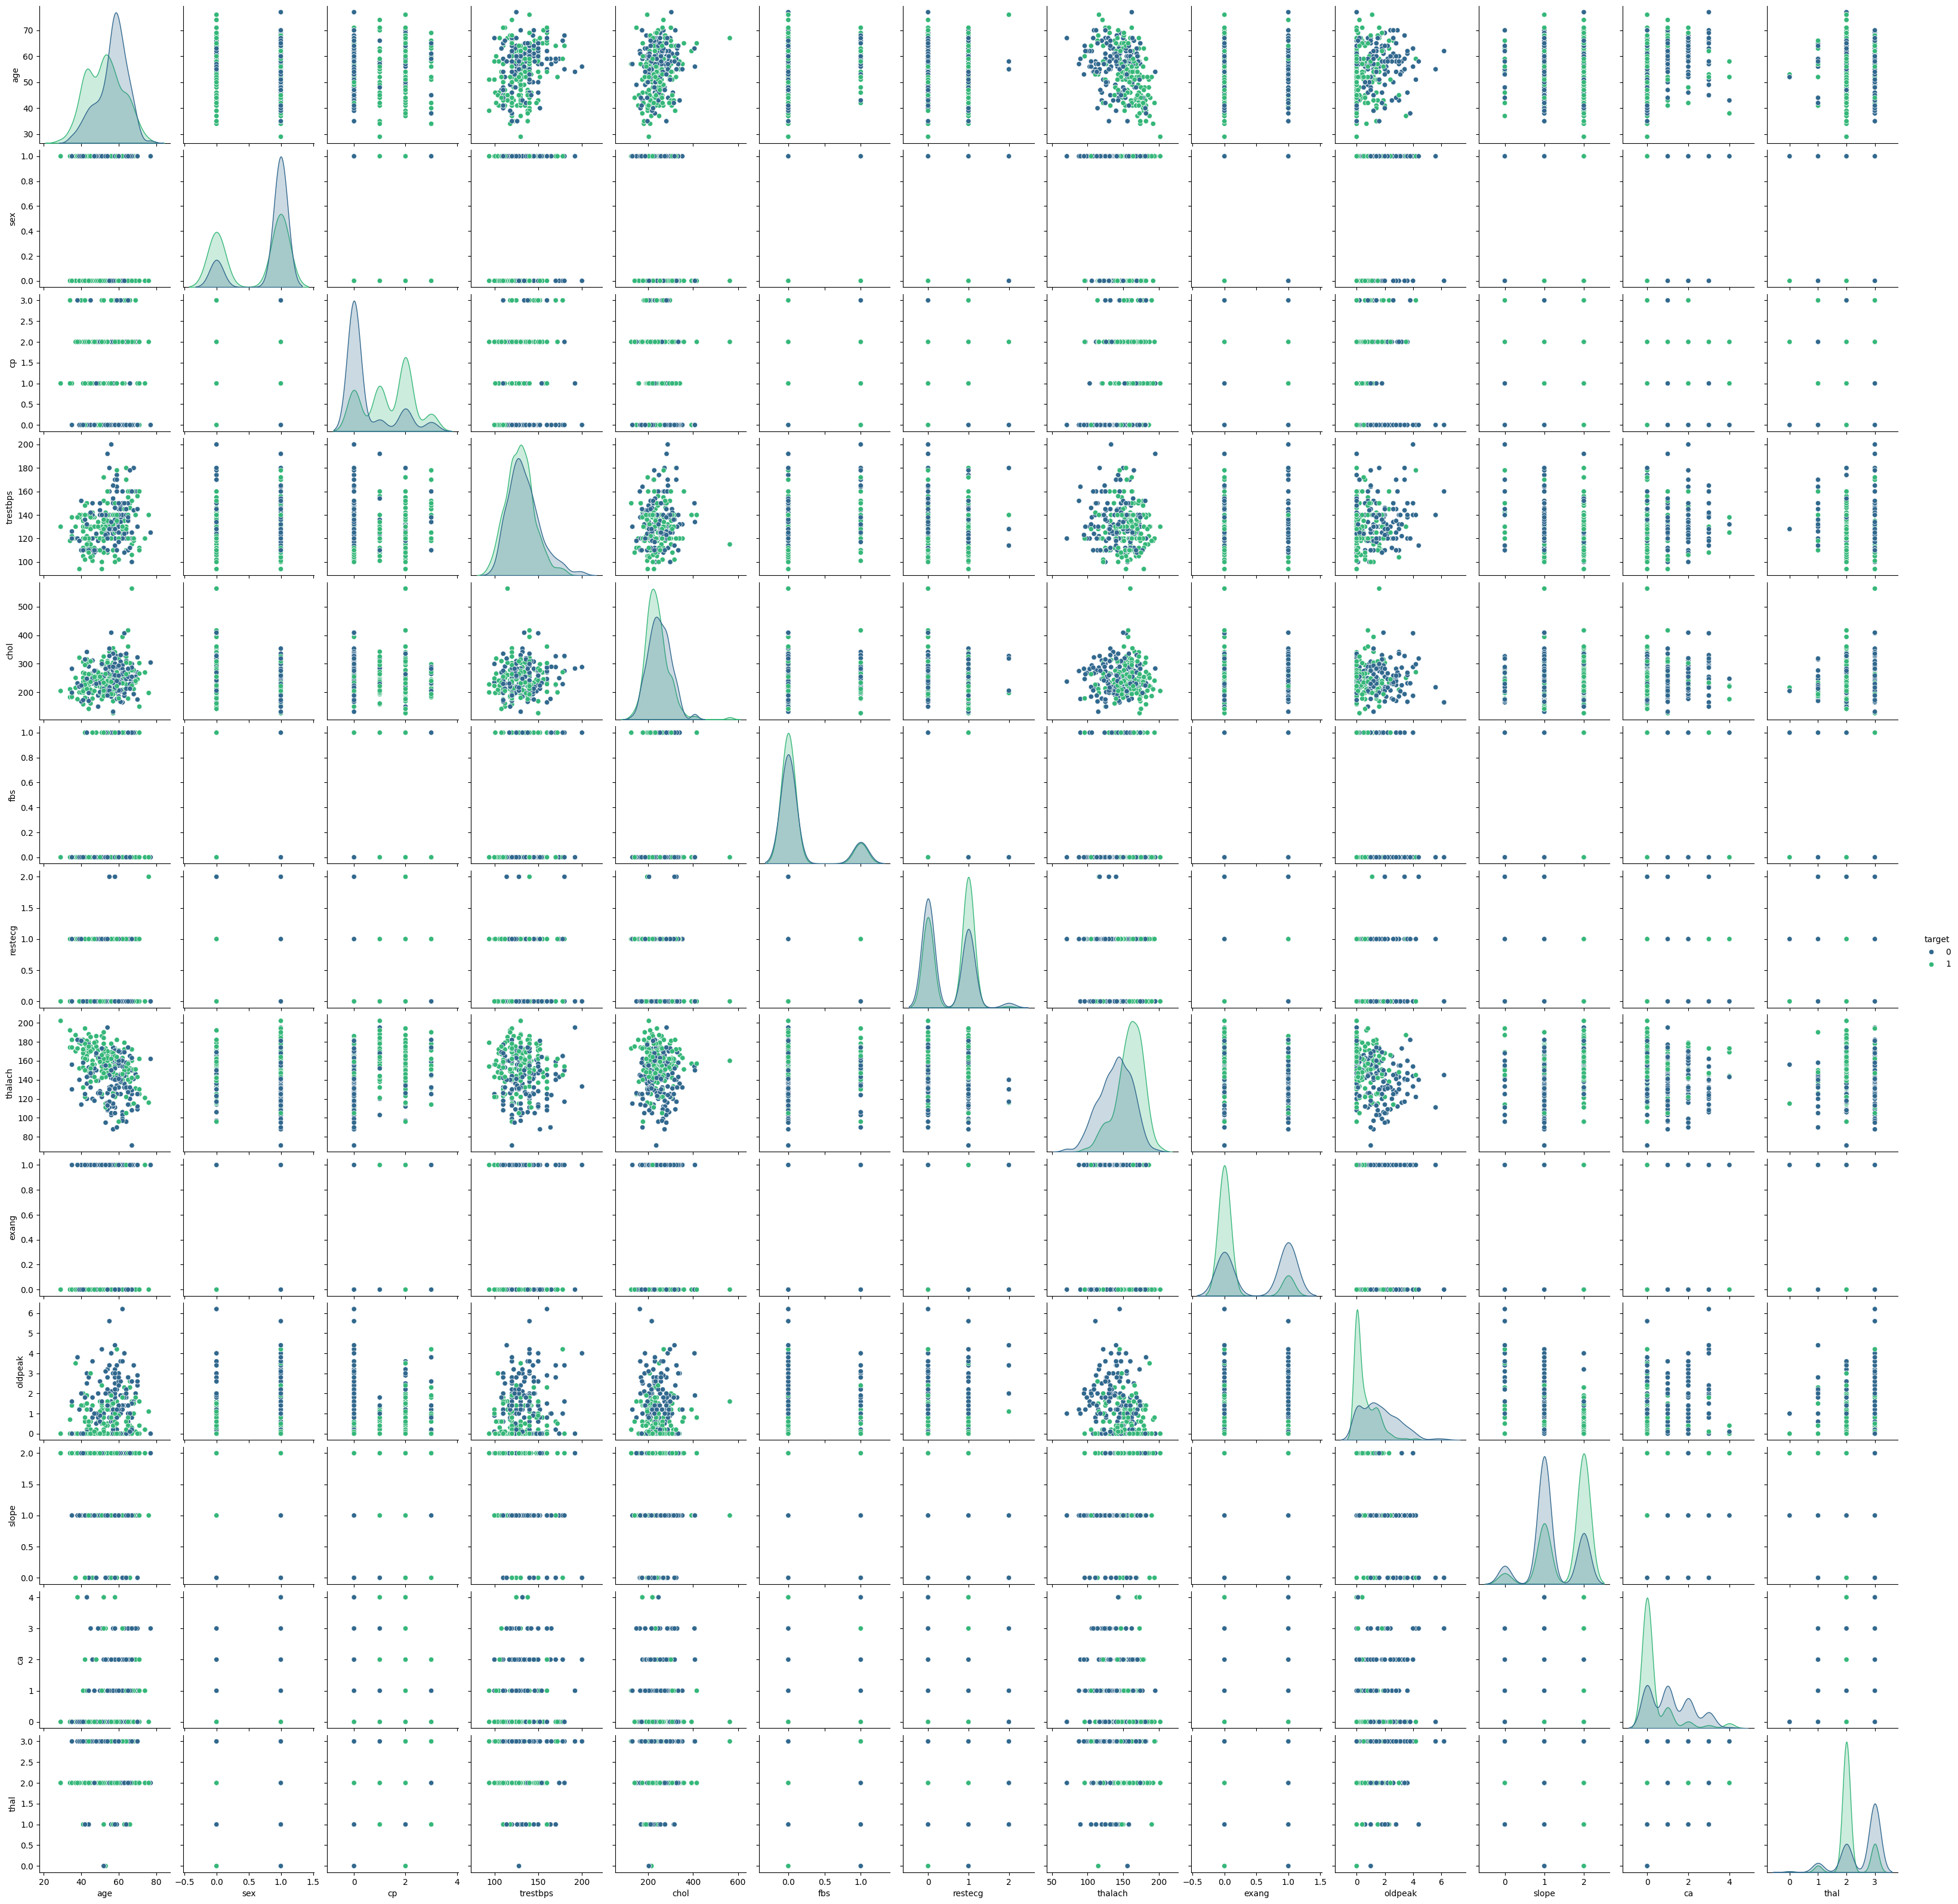

In [ ]:
# Pairplot to visualize relationships between attributes
sns.pairplot(data, hue='target', diag_kind='kde', palette='viridis')
plt.show()

<ipython-input-21-290c0e390dc7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




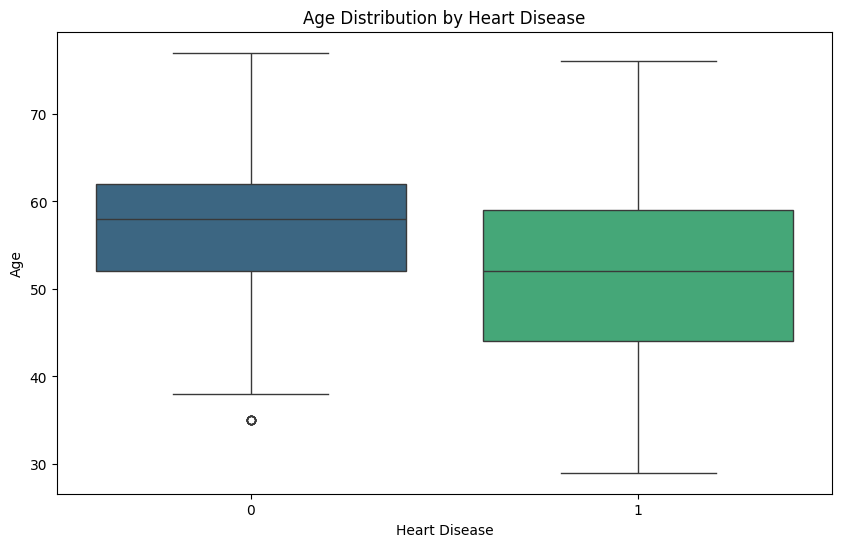

In [ ]:
# Boxplot of age distribution by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=data, palette='viridis')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

<ipython-input-22-3548cc1f28c1>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




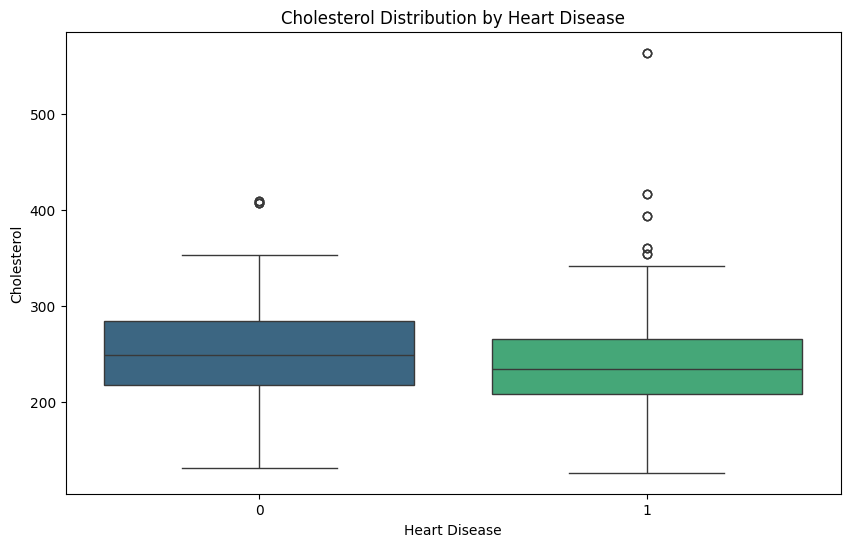

In [ ]:
# Boxplot of cholesterol distribution by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=data, palette='viridis')
plt.title('Cholesterol Distribution by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

In [ ]:
# Insights
print("\nInsights:")
print("1. The correlation heatmap shows that the most correlated features with heart disease are chest pain type (cp), maximum heart rate (thalach), and ST depression (oldpeak).")
print("2. Age and cholesterol levels are higher in patients with heart disease.")
print("3. The pairplot provides a comprehensive view of the relationships between multiple features.")
print("4. The boxplots show the distribution of age and cholesterol levels by heart disease status, highlighting the differences between the groups.")
print("5. Scatter plots reveal that younger patients tend to have higher maximum heart rates, and there are distinguishable patterns in cholesterol levels between those with and without heart disease.")


Insights:
1. The correlation heatmap shows that the most correlated features with heart disease are chest pain type (cp), maximum heart rate (thalach), and ST depression (oldpeak).
2. Age and cholesterol levels are higher in patients with heart disease.
3. The pairplot provides a comprehensive view of the relationships between multiple features.
4. The boxplots show the distribution of age and cholesterol levels by heart disease status, highlighting the differences between the groups.
5. Scatter plots reveal that younger patients tend to have higher maximum heart rates, and there are distinguishable patterns in cholesterol levels between those with and without heart disease.


# Key Insights and Findings:

**Distribution of Heart Disease:**

The dataset shows a balanced distribution of individuals with and without heart disease.

**Age:**

The average age of individuals with heart disease is slightly higher compared to those without heart disease. This suggests age as a contributing factor to heart disease.

**Cholesterol:**

Individuals with higher cholesterol levels are more likely to have heart disease. The average cholesterol level is higher in patients with heart disease.

**Maximum Heart Rate (Thalach):**

A lower maximum heart rate is associated with a higher likelihood of heart disease. Younger patients tend to have higher maximum heart rates.

**Correlation Analysis:**

The correlation heatmap indicates that the most significant features correlated with heart disease are chest pain type (cp), maximum heart rate (thalach), and ST depression (oldpeak).

**Chest Pain Type (cp):**

Chest pain type shows a strong correlation with heart disease, particularly certain types of chest pain that are more common in patients with heart disease.

**ST Depression (Oldpeak):**

ST depression induced by exercise relative to rest (oldpeak) is higher in patients with heart disease, indicating a potential stress-related component.

**Other Factors:**

Attributes like resting blood pressure (trestbps), fasting blood sugar (fbs), and electrocardiographic results (restecg) also show varying degrees of association with heart disease but are less prominent compared to the key factors mentioned above.

# Conclusion:

The analysis highlights significant factors contributing to heart disease, including age, cholesterol levels, maximum heart rate, chest pain type, and ST depression. These findings can be useful for medical professionals to identify high-risk individuals and for further research into preventive measures and treatments for heart disease. The visualizations provide a clear and comprehensive understanding of how these factors interact and influence the presence of heart disease.